**Install Library**

In [1]:
!pip install geopandas
!pip install catboost
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 13.2 MB/s 
     |████████████████████████████████| 7.8 MB 45.5 MB/s 
     |████████████████████████████████| 16.6 MB 47.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 23 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Library**

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
from simple_colors import *

**Load and Read Dataset**

In [3]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/master/USGS/Earthquakes.csv"
df = pd.read_csv(dataset)
df = df[df.mag.notna()]
df.time = pd.to_datetime(df.time)
df = df[::-1]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
35244,2020-07-12 10:31:53.318000+00:00,67.791600,-158.636400,15.00,1.10,ml,NaN,NaN,NaN,0.42,...,2020-08-04T02:49:26.410Z,"85 km NNW of Ambler, Alaska",earthquake,NaN,0.20,NaN,NaN,reviewed,ak,ak
35243,2020-07-12 10:38:04.580000+00:00,33.177833,-116.127833,11.36,0.72,ml,35.0,60.0,0.040210,0.19,...,2020-07-13T22:21:26.937Z,"4km N of Ocotillo Wells, CA",earthquake,0.24,0.34,0.158,12.0,reviewed,ci,ci
35242,2020-07-12 10:38:50.280000+00:00,38.816334,-122.813500,3.17,0.91,md,22.0,46.0,0.007542,0.02,...,2020-07-12T11:51:04.930Z,"7km NW of The Geysers, CA",earthquake,0.26,0.50,0.130,3.0,automatic,nc,nc
35241,2020-07-12 10:40:29.962000+00:00,63.047100,-150.433700,107.20,1.10,ml,NaN,NaN,NaN,0.21,...,2020-08-04T02:49:33.285Z,"63 km NNE of Petersville, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
35240,2020-07-12 10:50:55.660000+00:00,36.073167,-117.642167,4.75,0.88,ml,13.0,85.0,0.110600,0.14,...,2020-07-12T16:37:38.032Z,"28km E of Coso Junction, CA",earthquake,0.27,2.64,0.189,9.0,reviewed,ci,ci


**Perhitungan Data Statistik**

In [4]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,35244.000000,35244.000000,35244.000000,35244.000000,28038.000000,29241.000000,24218.000000,35244.000000,24989.000000,35244.000000,26445.000000,27361.000000
mean,37.167249,-108.586930,21.478567,1.663011,23.384443,116.452087,0.816648,0.275342,1.929334,4.240669,0.252210,17.163664
std,19.093721,67.752118,54.360684,1.311471,21.687801,60.420181,2.755295,0.272877,3.300874,389.384796,0.461743,34.172450
min,-65.352200,-179.996400,-3.730000,-1.430000,0.000000,11.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,33.419542,-149.703350,3.600000,0.800000,10.000000,71.000000,0.025000,0.100000,0.280000,0.470000,0.103000,5.000000
50%,38.151200,-118.777667,8.000000,1.340000,17.000000,102.000000,0.059583,0.160000,0.480000,0.800000,0.160000,9.000000
75%,47.512008,-113.777417,14.560000,2.110000,29.000000,150.000000,0.165825,0.400000,1.090000,1.780000,0.236000,18.000000
max,87.349200,180.000000,647.998000,7.800000,444.000000,355.000000,43.236000,2.460000,26.400000,73091.100000,5.520000,760.000000


**Dataframe Information**

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35244 entries, 35244 to 0
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             35244 non-null  datetime64[ns, UTC]
 1   latitude         35244 non-null  float64            
 2   longitude        35244 non-null  float64            
 3   depth            35244 non-null  float64            
 4   mag              35244 non-null  float64            
 5   magType          35244 non-null  object             
 6   nst              28038 non-null  float64            
 7   gap              29241 non-null  float64            
 8   dmin             24218 non-null  float64            
 9   rms              35244 non-null  float64            
 10  net              35244 non-null  object             
 11  id               35244 non-null  object             
 12  updated          35244 non-null  object             
 13  place           

**Check Missing Value**

In [6]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 7206
gap                 6003
dmin               11026
rms                    0
net                    0
id                     0
updated                0
place                789
type                   0
horizontalError    10255
depthError             0
magError            8799
magNst              7883
status                 0
locationSource         0
magSource              0
dtype: int64

In [7]:
print(f'Magnitude Minimum: {df.mag.min()}')
print(f'Magnitude Maximum: {df.mag.max()}')

Magnitude Minimum: -1.43
Magnitude Maximum: 7.8


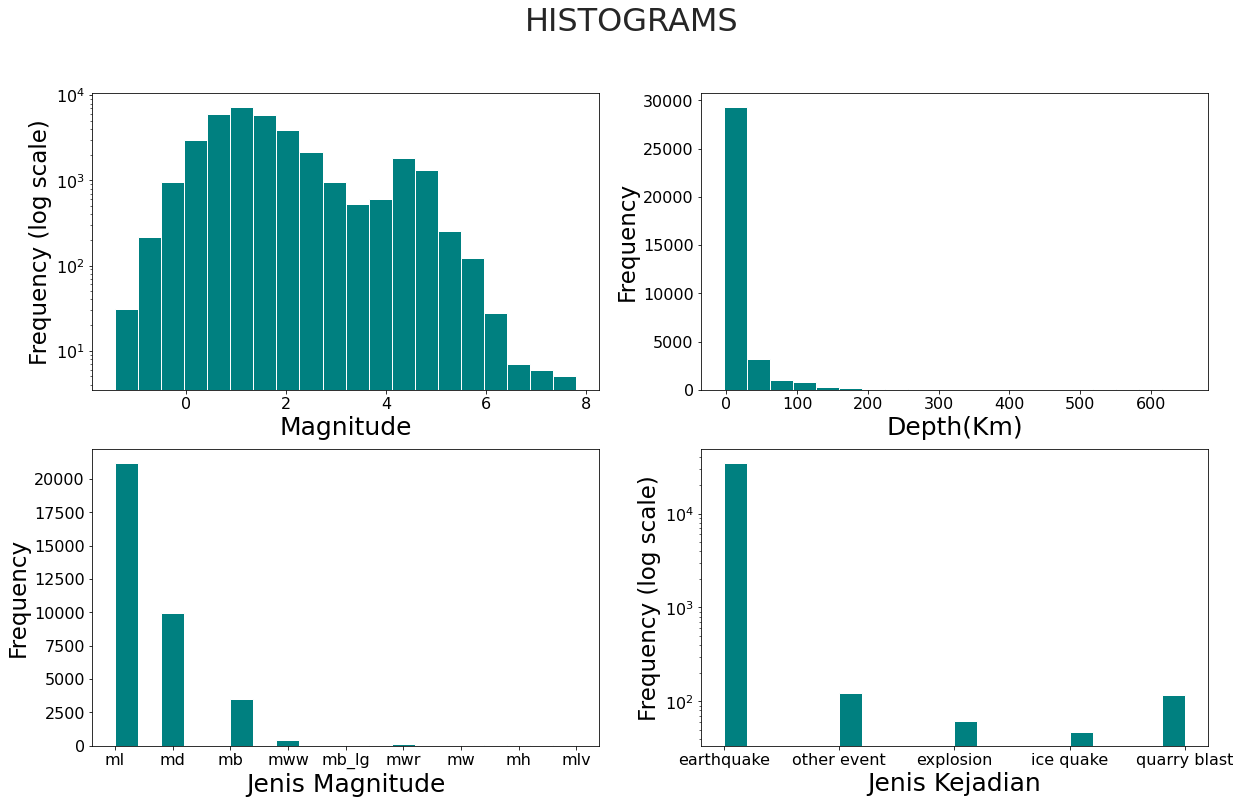

In [8]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)

# Draw a nested boxplot 
axes[0][0].hist(df['mag'],bins=20,color='teal')
axes[0][1].hist(df['depth'],bins=20,color='teal')
axes[1][0].hist(df['magType'],bins=20,color='teal')
axes[1][1].hist(df['type'],bins=20,color='teal')
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Jenis Magnitude",fontsize=25)
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            #ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            #ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Jenis Kejadian",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)

**Pembagian Class Kekuatan Gempa**

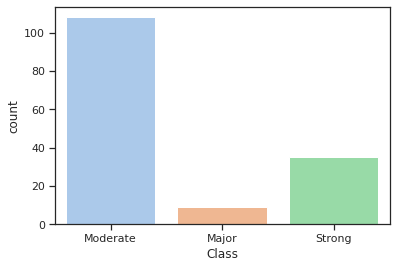

In [9]:
df.loc[df.mag >= 8, 'Class'] = 'Disastrous'
df.loc[(df.mag >= 7) & (df.mag < 7.9), 'Class'] = 'Major'
df.loc[(df.mag >= 6) & (df.mag < 6.9), 'Class'] = 'Strong'
df.loc[(df.mag >= 5.5) & (df.mag < 5.9), 'Class'] = 'Moderate'
sns.countplot(data=df, x='Class')

**Detail Information**

In [10]:
df = df.copy()
df['location'] = df.place.str.split(', ', expand=True)[1]
print(f'Total locations: {df.location.nunique()}')

print("20 Lokasi Gempa dengan Rata-rata Magnitude Terbesar")
g1 = df.groupby(['location'])['mag'].mean().nlargest(20)
print(g1)

print("\n20 Lokasi Gempa dengan Rata-rata Magnitude Terkecil")
g2 = df.groupby(['location'])['mag'].mean().nsmallest(20)
print(g2)

Total locations: 134
20 Lokasi Gempa dengan Rata-rata Magnitude Terbesar
location
American Samoa                      5.800000
Libya                               5.200000
Saint Helena                        5.150000
Mozambique                          4.900000
Samoa                               4.900000
Federated States of Micronesia      4.900000
Mongolia                            4.800000
Tuvalu                              4.800000
Panama                              4.750000
Papua New Guinea                    4.734615
Vanuatu                             4.713000
Myanmar                             4.705882
Taiwan                              4.696552
Mexico                              4.686301
Democratic Republic of the Congo    4.666667
Russia region                       4.650000
Solomon Islands                     4.639394
Micronesia                          4.637500
Northern Mariana Islands            4.632836
Philippines                         4.625325
Name: mag, dtype: 

**Function Definition**

In [11]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    """Creates time series features based on time series index."""
    df = df.copy()
    df['hour'] = df.time.dt.hour
    df['dayofweek'] = df.time.dt.dayofweek
    df['month'] = df.time.dt.month
    df['year'] = df.time.dt.year
    df['dayofyear'] = df.time.dt.dayofyear
    df['dayofmonth'] = df.time.dt.day
    df['weekofyear'] = df.time.dt.isocalendar().week
    df['quarter'] = df.time.dt.quarter
    df['season'] = df.month % 12 // 3 + 1
    return df

def add_lags(df: pd.DataFrame) -> pd.DataFrame:
    df['mag_5eq_lag'] = df.mag.shift(5)
    df['mag_10eq_lag'] = df.mag.shift(10)
    df['mag_15eq_lag'] = df.mag.shift(15)

    df['depth_5eq_lag'] = df.depth.shift(5)
    df['depth_10eq_lag'] = df.depth.shift(10)
    df['depth_15eq_lag'] = df.depth.shift(15)
    return df

def add_rolling_windows(df: pd.DataFrame) -> pd.DataFrame:
    df['mag_5eq_avg'] = df.mag.rolling(window=5, center=False).mean()
    df['mag_10eq_avg'] = df.mag.rolling(window=10, center=False).mean()
    df['mag_15eq_avg'] = df.mag.rolling(window=15, center=False).mean()
    df['mag_5eq_min'] = df.mag.rolling(window=5, center=False).min()
    df['mag_10eq_min'] = df.mag.rolling(window=10, center=False).min()
    df['mag_15eq_min'] = df.mag.rolling(window=15, center=False).min()
    df['mag_5eq_max'] = df.mag.rolling(window=5, center=False).max()
    df['mag_10eq_max'] = df.mag.rolling(window=10, center=False).max()
    df['mag_15eq_max'] = df.mag.rolling(window=15, center=False).max()
    df['mag_5eq_std'] = df.mag.rolling(window=5, center=False).std()
    df['mag_10eq_std'] = df.mag.rolling(window=10, center=False).std()
    df['mag_15eq_std'] = df.mag.rolling(window=15, center=False).std()

    df['depth_5eq_avg'] = df.depth.rolling(window=5, center=False).mean()
    df['depth_10eq_avg'] = df.depth.rolling(window=10, center=False).mean()
    df['depth_15eq_avg'] = df.depth.rolling(window=15, center=False).mean()
    df['depth_5eq_min'] = df.depth.rolling(window=5, center=False).min()
    df['depth_10eq_min'] = df.depth.rolling(window=10, center=False).min()
    df['depth_15eq_min'] = df.depth.rolling(window=15, center=False).min()
    df['depth_5eq_max'] = df.depth.rolling(window=5, center=False).max()
    df['depth_10eq_max'] = df.depth.rolling(window=10, center=False).max()
    df['depth_15eq_max'] = df.depth.rolling(window=15, center=False).max()
    df['depth_5eq_std'] = df.depth.rolling(window=5, center=False).std()
    df['depth_10eq_std'] = df.depth.rolling(window=10, center=False).std()
    df['depth_15eq_std'] = df.depth.rolling(window=15, center=False).std()
    return df

data = []
for location in df.location.unique():
    temp = df.loc[df.location == location]
    temp = create_features(temp)
    temp = add_lags(temp)
    temp = add_rolling_windows(temp)

    data.append(temp)

df = pd.concat(data)

In [12]:
features = [
    'dayofyear',
    'hour',
    'dayofweek',
    'month',
    'season',
    'year',
    'mag_5eq_lag',
    'mag_10eq_lag',
    'mag_15eq_lag',
    'mag_5eq_avg',
    'mag_10eq_avg',
    'mag_15eq_avg',
    'mag_5eq_min',
    'mag_10eq_min',
    'mag_15eq_min',
    'mag_5eq_max',
    'mag_10eq_max',
    'mag_15eq_max',
    'mag_5eq_std',
    'mag_10eq_std',
    'mag_15eq_std',
    'depth_5eq_lag',
    'depth_10eq_lag',
    'depth_15eq_lag',
    'depth_5eq_avg',
    'depth_10eq_avg',
    'depth_15eq_avg',
    'depth_5eq_min',
    'depth_10eq_min',
    'depth_15eq_min',
    'depth_5eq_max',
    'depth_10eq_max',
    'depth_15eq_max',
    'depth_5eq_std',
    'depth_10eq_std',
    'depth_15eq_std',
    'latitude',
    'longitude',
]
cat_features = ['location']
target = 'mag'

In [13]:
date = '2022-09-25 00:00:00.000000+00:00'

df_train = df.loc[df.time < date]
df_test = df.loc[df.time >= date]

print(f'Ukuran Data Pelatihan: {len(df_train) / (len(df_test) + len(df_train)):.2f}')
print(f'Ukuran Data Pengujian: {len(df_test) / (len(df_test) + len(df_train)):.2f}')


Ukuran Data Pelatihan: 0.79
Ukuran Data Pengujian: 0.21


**Split**

In [14]:
tss = model_selection.TimeSeriesSplit(n_splits=5, test_size=3600, gap=24)
df = df.sort_index()

In [15]:
fold = 0
predictions = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    x_train = train[features + cat_features]
    y_train = train[target]

    x_test = test[features + cat_features]
    y_test = test[target]

    model = cb.CatBoostRegressor(
        depth=7, 
        learning_rate=0.01, 
        iterations=1000, 
        early_stopping_rounds=50,
        cat_features=cat_features,
    )
    model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=100)

    y_pred = model.predict(x_test)
    predictions.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

0:	learn: 1.1715721	test: 1.1715721	test1: 1.5351445	best: 1.5351445 (0)	total: 91.8ms	remaining: 1m 31s
100:	learn: 0.6884356	test: 0.6884356	test1: 0.7632562	best: 0.7632562 (100)	total: 3.69s	remaining: 32.9s
200:	learn: 0.5551174	test: 0.5551174	test1: 0.5532792	best: 0.5532792 (200)	total: 9.94s	remaining: 39.5s
300:	learn: 0.5144543	test: 0.5144543	test1: 0.5033324	best: 0.5033324 (300)	total: 16.2s	remaining: 37.6s
400:	learn: 0.4936838	test: 0.4936838	test1: 0.4862102	best: 0.4862102 (400)	total: 22.1s	remaining: 33s
500:	learn: 0.4777879	test: 0.4777879	test1: 0.4774414	best: 0.4774414 (500)	total: 24.9s	remaining: 24.8s
600:	learn: 0.4653617	test: 0.4653617	test1: 0.4722399	best: 0.4722399 (600)	total: 27.8s	remaining: 18.5s
700:	learn: 0.4541016	test: 0.4541016	test1: 0.4676925	best: 0.4676925 (700)	total: 30.6s	remaining: 13.1s
800:	learn: 0.4432932	test: 0.4432932	test1: 0.4641672	best: 0.4641672 (800)	total: 33.5s	remaining: 8.32s
900:	learn: 0.4336478	test: 0.4336478	tes

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    df_train[features + cat_features],
    df_train[target], 
    test_size=0.2, 
    random_state=42,
)

In [17]:
grid = {
    'depth': [5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [1500],
}

model = cb.CatBoostRegressor(early_stopping_rounds=50, cat_features=cat_features)
grid_search_result = model.grid_search(grid, x_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
462:	learn: 0.3416678	test: 0.4720465	best: 0.4720465 (462)	total: 14.4s	remaining: 32.3s
463:	learn: 0.3413749	test: 0.4717031	best: 0.4717031 (463)	total: 14.4s	remaining: 32.3s
464:	learn: 0.3411421	test: 0.4716910	best: 0.4716910 (464)	total: 14.5s	remaining: 32.2s
465:	learn: 0.3409961	test: 0.4716928	best: 0.4716910 (464)	total: 14.5s	remaining: 32.2s
466:	learn: 0.3407507	test: 0.4716615	best: 0.4716615 (466)	total: 14.5s	remaining: 32.2s
467:	learn: 0.3404623	test: 0.4717524	best: 0.4716615 (466)	total: 14.6s	remaining: 32.2s
468:	learn: 0.3400960	test: 0.4716914	best: 0.4716615 (466)	total: 14.6s	remaining: 32.1s
469:	learn: 0.3398963	test: 0.4717071	best: 0.4716615 (466)	total: 14.7s	remaining: 32.1s
470:	learn: 0.3396192	test: 0.4717542	best: 0.4716615 (466)	total: 14.7s	remaining: 32.1s
471:	learn: 0.3393697	test: 0.4716966	best: 0.4716615 (466)	total: 14.7s	remaining: 32s
472:	learn: 0.3392411	test: 0.4717306	best: 0.47166

In [23]:
print(grid_search_result['params'] , "\n")
prediction = model.predict(x_test)
print(f'Akurasi model: {model.score(x_test, y_test):.2f}')
print(f'Nilai Mean Absolute Error: {mean_absolute_error(y_test, prediction):.2f}')
print(f'Nilai Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, prediction)):.2f}')

{'depth': 7, 'iterations': 1500, 'learning_rate': 0.05} 

Akurasi model: 0.86
Nilai Mean Absolute Error: 0.34
Nilai Root Mean Squared Error: 0.46


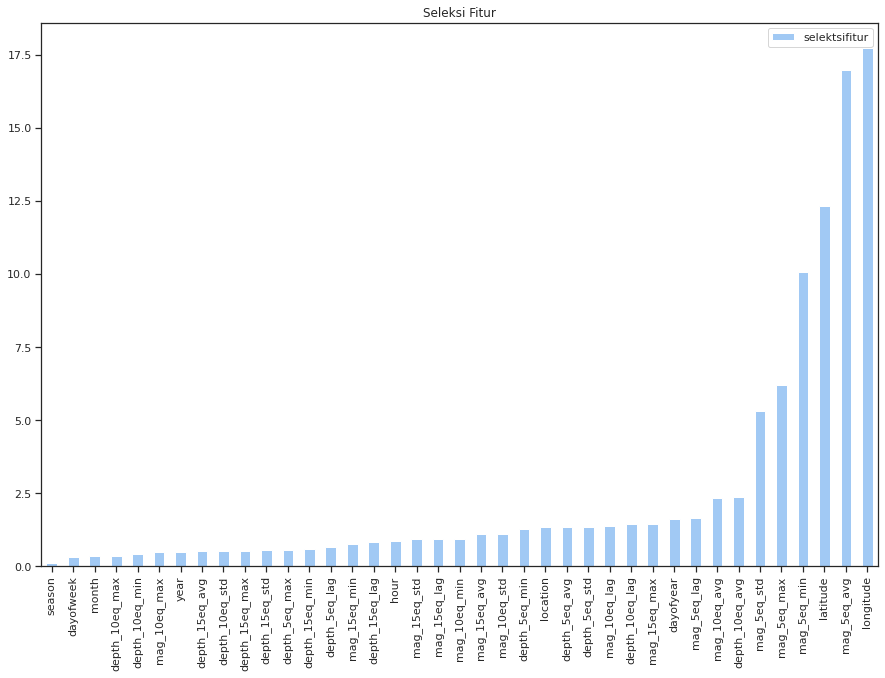



                selektsifitur
longitude           17.708839
mag_5eq_avg         16.986683
latitude            12.336739
mag_5eq_min         10.074391
mag_5eq_max          6.210568
mag_5eq_std          5.298221
depth_10eq_avg       2.353320
mag_10eq_avg         2.349012
mag_5eq_lag          1.653035
dayofyear            1.621202


In [19]:
fi = pd.DataFrame(data=model.feature_importances_, index=model.feature_names_, columns=['selektsifitur'])
fi.sort_values('selektsifitur').plot(kind='bar', title='Seleksi Fitur', figsize=(15, 10))
plt.show()

print("\n")
print(fi.sort_values('selektsifitur', ascending=False).head(10))


In [20]:
from google.colab import output
output.disable_custom_widget_manager()

Akurasi Model: 0.83
Nilai Mean Absolute Error: 0.34
Nilai Root Mean Squared Error: 0.47


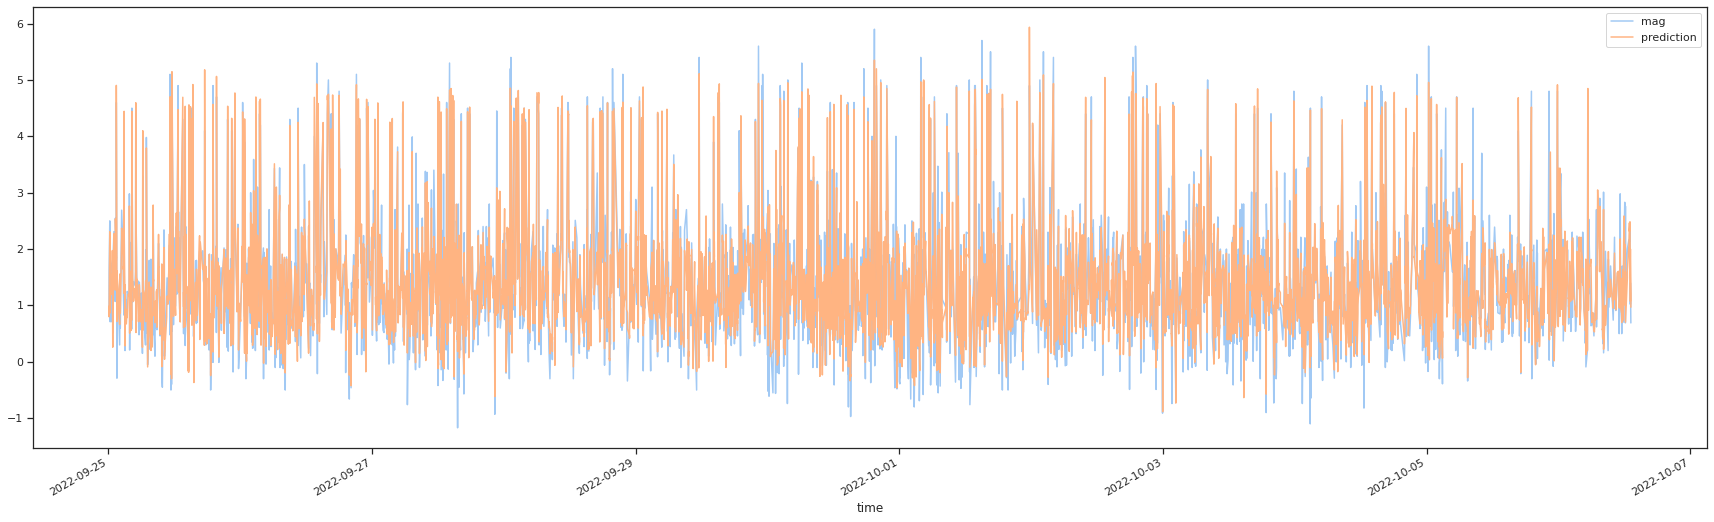

In [24]:
prediction = model.predict(df_test[features + cat_features])
print(f'Akurasi Model: {model.score(df_test[features + cat_features], df_test[target]):.2f}')
print(f'Nilai Mean Absolute Error: {mean_absolute_error(df_test[target], prediction):.2f}')
print(f'Nilai Root Mean Squared Error: {np.sqrt(mean_squared_error(df_test[target], prediction)):.2f}')

df_plot = pd.DataFrame({'time': df_test.time, 'mag': df_test[target], 'prediction': prediction})
df_plot = df_plot.sort_values(by='time')
df_plot.plot(figsize=(30, 9), x='time', y=['mag', 'prediction'])
plt.show()